In [229]:
#importing the necessary libraries.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

In [230]:
# Define the mapping dictionary for class names.
class_map = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


In [231]:
# #loading the dataset.
df = pd.read_excel("C:\\Users\\User\\Downloads\\DryBeanDataset\\Dry_Bean_Dataset.xlsx")


In [232]:
# The Conversion of a category variable to a numerical variable.
df['Class'] = df['Class'].map(class_map)

# Distinguish between features and the target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

In [233]:
# Divide the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [234]:
# Scale the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')  # save the scaler object to a file

['scaler.pkl']

In [235]:
# Train the SVM model with GridSearchCV to find the optimal hyperparameters.
parameters = {'kernel':('linear', 'rbf'), 'C':[0.3, 0.5, 1, 8, 10, 30]}
svc = SVC()
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.3, 0.5, 1, 8, 10, 30],
                         'kernel': ('linear', 'rbf')})

In [236]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best hyperparameters:  {'C': 30, 'kernel': 'rbf'}
Accuracy: 0.9311949069539667


In [237]:
# Calculate precision, recall, and F1-score
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9432398778525573
Recall: 0.9406656210817942
F1-score: 0.9419249502331498


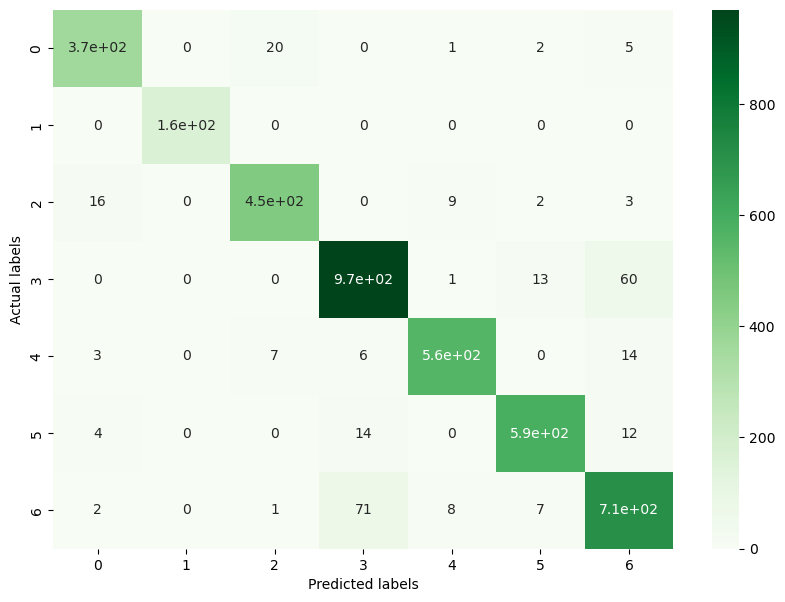

In [238]:
# Print the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()


In [239]:
# Print the classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       395
           1       1.00      1.00      1.00       161
           2       0.94      0.94      0.94       479
           3       0.91      0.93      0.92      1043
           4       0.97      0.95      0.96       588
           5       0.96      0.95      0.96       619
           6       0.88      0.89      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [240]:
# Save the trained model to a file.
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [241]:
# Load the trained model from the file.
model = joblib.load('best_model.pkl')


In [242]:
# Load the scaler object from the file.
scaler = joblib.load('scaler.pkl')


In [243]:
# Load the XLSX file with the test set data.
df_test = pd.read_excel("C:\\Users\\User\\Downloads\\DryBeanDataset\\Dry_Bean_Dataset.xlsx")

In [244]:
# Convert the category variable to a numerical variable using the mapping dictionary.
df_test['Class'] = df_test['Class'].map(class_map)

In [245]:
# Preprocess the test set data.
X_test = df_test.drop(['Class'], axis=1)
X_test = scaler.transform(X_test)


In [246]:
# Predict the class labels for the test set.
y_pred = model.predict(X_test)


In [247]:
# Create a new DataFrame with the instance IDs and predicted class labels.
df_results = pd.DataFrame({'ID': df_test.index, 'Predicted_class': y_pred_names})


In [248]:
# Save the DataFrame to a CSV file with the instance IDs as the index.
df_results.set_index('ID', inplace=True)
df_results.to_csv('predictions.csv')